This notebook makes the mass and orbital evolution plots for hot Jupiters undergoing Roche-lobe overflow from Jackson et al. (2016) CeMDA.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import mesa_reader as ms
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle
from astropy import units as u
from astropy.units import cds
import glob

Msol_to_MJup = (cds.Msun.to('kg')/cds.Mjup.to('kg'))

In [3]:
#First we'll plot the HJs all with Mcore = 10 MEarth.
initial_masses = [0.5*cds.Mjup, 1.*cds.Mjup, 5.*cds.Mjup, 10.*cds.Mjup]
#Then variable cores
core_masses = [1.*cds.Mgeo, 3.*cds.Mgeo, 5.*cds.Mgeo, 10.*cds.Mgeo]

['./MESA/make_planets_initial-RLO_variable-core/models/Mpinit_1.0_MJup_1.0_ME_qs7']
['./MESA/make_planets_initial-RLO_variable-core/models/Mpinit_1.0_MJup_3.0_ME_qs7']
['./MESA/make_planets_initial-RLO_variable-core/models/Mpinit_1.0_MJup_5.0_ME_qs7']


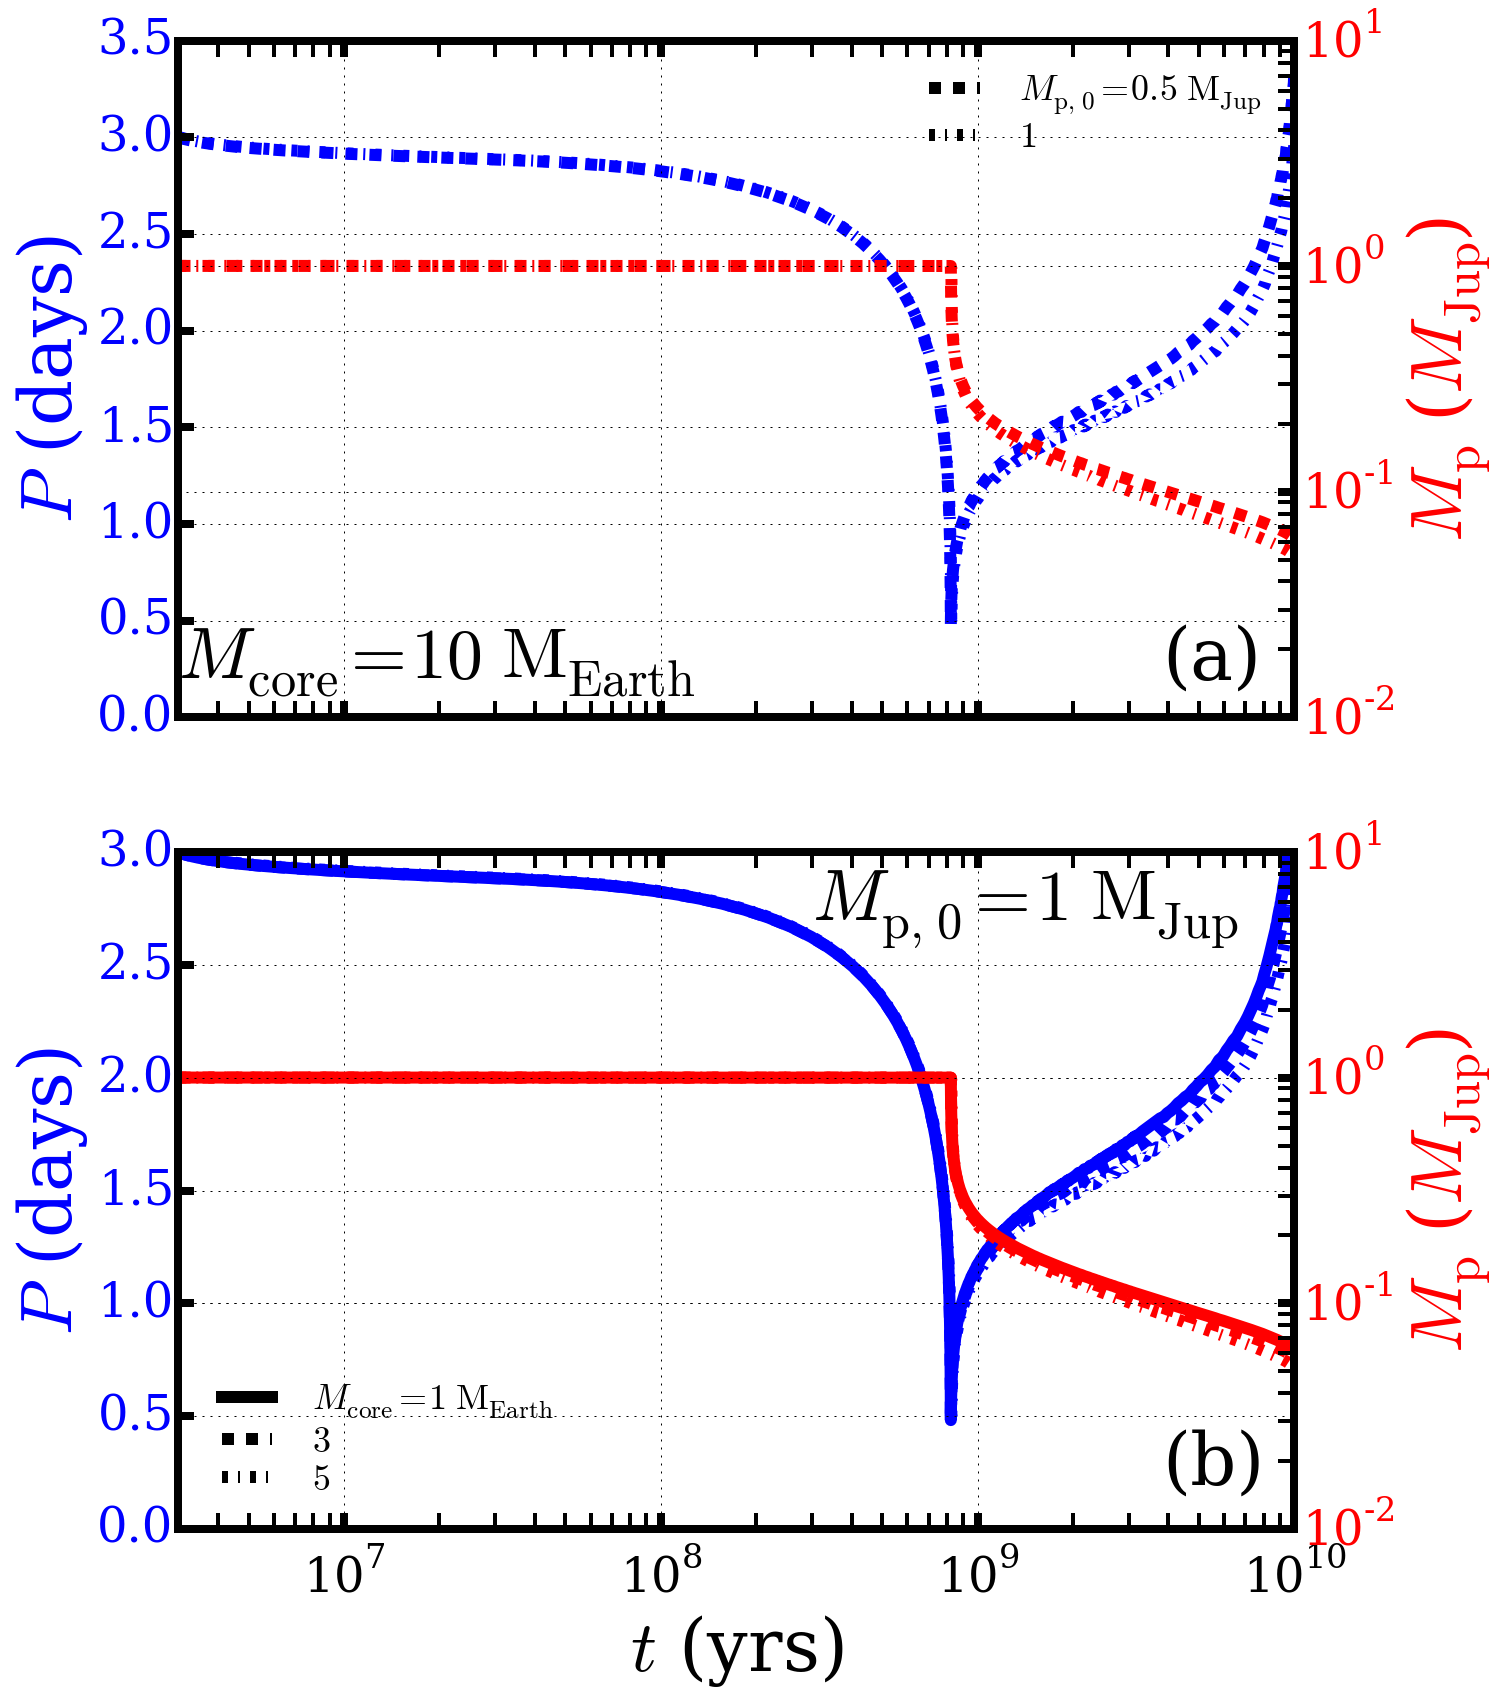

In [12]:
fig = plt.figure(figsize=(10,10*4./3))
ax1 = fig.add_subplot(211)

#First the variable initial mass/Mcore = 10 MEarth models

#Have lines cycle through styles rather than colors
linecycler = cycle(["-","--","-.",":"])

lines = []
line_names = []

ax1.set_ylabel('$P$ (days)', color='b', fontsize=36)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax2 = ax1.twinx()
ax2.set_ylabel('$M_\mathrm{p}$ ($M_\mathrm{Jup}$)', color='r', fontsize=36)

for cur_initial_mass in initial_masses:   
    ls = next(linecycler)
    
#    directory = (glob.glob('./MESA/make_planets_initial-RLO_10Mearth/models/*%.1f*_qs5' % cur_initial_mass.value))
    directory = (glob.glob('./MESA/make_planets_initial-RLO_variable-core/models/*MJup_*%.1f*_ME*_qs7' % 
                            cur_initial_mass.value))
    if(len(directory) == 0):
        continue

    hst = ms.MesaData(file_name=directory[0] + '/binary_history.data')
    
    lines.extend(ax1.semilogx(hst.data('age'), hst.data('period_days'), ls=ls, color='b', lw=6))
    ax2.loglog(hst.data('age'), hst.data('star_1_mass')*Msol_to_MJup, ls=ls, color='r', lw=6)

for tl in ax1.get_yticklabels():
    tl.set_color('b')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
ax1.text(3e6, 0.2, '$M_{\\rm core} = 10\ {\\rm M_{Earth}}$', fontsize=36)
line_names = ["$M_{\\rm p,\ 0} = %.1f\ {\\rm M_{Jup}}$" % initial_masses[0].value]
for cur_initial_mass in initial_masses[1:]:
    line_names.extend(["$%i$" % cur_initial_mass.value])
    
handles, labels = ax1.get_legend_handles_labels()
leg = ax1.legend(lines, line_names, labelspacing=0.1, loc='upper right', fontsize=18)
leg.draw_frame(False)
#set the line color of each legend object
for legobj in leg.legendHandles:
    legobj.set_color('black')

ax1.set_xlim([3e6, 1e10])
ax2.set_ylim([1e-2, 1e1])
 
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax1.text(4e9, 0.2, '(a)', fontsize=36)

#Mpinit = 1 MJup/variable Mcore models
lines = []
line_names = []

ax1 = fig.add_subplot(212)
#First the variable initial mass/Mcore = 10 MEarth models
ax1.set_xlabel('$t$ (yrs)', fontsize=36)
ax1.set_ylabel('$P$ (days)', color='b', fontsize=36)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax2 = ax1.twinx()
ax2.set_ylabel('$M_\mathrm{p}$ ($M_\mathrm{Jup}$)', color='r', fontsize=36)

for cur_core_mass in core_masses:   
    ls = next(linecycler)
    
#     directory = (glob.glob('./MESA/make_planets_initial-RLO_variable-core/models/*MJup_*%.1f*_ME*_qs5' % 
#                            cur_core_mass.value))
    directory = (glob.glob('./MESA/make_planets_initial-RLO_variable-core/models/*MJup_*%.1f*_ME*_qs7' % 
                            cur_core_mass.value))
    if(len(directory) == 0):
        continue
    
    print(directory)
    hst = ms.MesaData(file_name=directory[0] + '/binary_history.data')
    
    lines.extend(ax1.semilogx(hst.data('age'), hst.data('period_days'), ls=ls, color='b', lw=6))
    ax2.loglog(hst.data('age'), hst.data('star_1_mass')*Msol_to_MJup, ls=ls, color='r', lw=6)

for tl in ax1.get_yticklabels():
    tl.set_color('b')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
ax1.text(3e8, 2.7, '$M_{\\rm p,\ 0} = 1\ {\\rm M_{Jup}}$', fontsize=36)
line_names = ["$M_{\\rm core} = %i\ {\\rm M_{Earth}}$" % core_masses[0].value]
for cur_core_mass in core_masses[1:]:
    line_names.extend(["$%i$" % cur_core_mass.value])
        
handles, labels = ax1.get_legend_handles_labels()
leg = ax1.legend(lines, line_names, labelspacing=0.1, loc='lower left', fontsize=18)
leg.draw_frame(False)
#set the line color of each legend object
for legobj in leg.legendHandles:
    legobj.set_color('black')
    
ax1.set_xlim([3e6, 1e10])
ax1.set_ylim([0, 3])
    
ax1.text(4e9, 0.2, '(b)', fontsize=36)    

#fig.savefig('plot_mass_orbital_evolution_variable-Mp0-Mcore.eps', dpi=1000, bbox_inches='tight')